# Exploratory Data Analysis (EDA) - Data Science

- Steps:
    - Understand the dataset - assess the quality of the dataset
    - Distribute of the dataset - How does the data look like?
    - Correlactions - Find patterns in the dataset

In [403]:
###############################################################
################### DATA CLEANING #############################
###############################################################

In [496]:
import pandas                   as pd
import sys
import itertools
from collections               import Counter
import numpy                   as np
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
import gc # Garbage Collector interface
import feather
import time
from datetime                  import datetime
import matplotlib.pyplot       as plt
import seaborn                 as sns
from sklearn.feature_selection import mutual_info_classif
import plotly.express          as ex


from pandas_profiling import ProfileReport

import typing

##### >>> https://towardsdatascience.com/a-straightforward-guide-to-cleaning-and-preparing-data-in-python-8c82f209ae33
# source dataset: https://www.dataquest.io/blog/machine-learning-preparing-data/

# data cleaning - sources
# https://medium.com/sciforce/data-cleaning-and-preprocessing-for-beginners-25748ee00743
# https://medium.com/bitgrit-data-science-publication/data-cleaning-with-python-f6bc3da64e45
# https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4
# https://towardsdatascience.com/data-cleaning-and-feature-engineering-the-underestimated-parts-of-machine-learning-10681dae4cf7


## Quick Dataset Overview

In [405]:
# dataframe - df
# read csv file, the columns are separated (sep) by ','
df = pd.read_csv('../data/lending_club_loans.csv')
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,Jan-17,0.0,INDIVIDUAL,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,Oct-16,0.0,INDIVIDUAL,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91,Jan-17,0.0,INDIVIDUAL,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48,Apr-16,0.0,INDIVIDUAL,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Fully Paid,n,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-17,67.30,Jan-17,0.0,INDIVIDUAL,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.00,322.97,0.00,0.0,0.00,Jul-10,80.90,Jun-10,NaN,INDIVIDUAL,NaN,0,NaN,NaN
39782,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.00,1413.49,0.00,0.0,0.00,Jul-10,281.94,Jul-10,NaN,INDIVIDUAL,NaN,0,NaN,NaN
39783,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.00,272.16,0.00,0.0,0.00,Apr-08,0.00,Jun-07,NaN,INDIVIDUAL,NaN,0,NaN,NaN
39784,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,208xx,MD,3.72,0,Nov-88,0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.00,174.20,0.00,0.0,0.00,Jan-08,0.00,Jun-07,NaN,INDIVIDUAL,NaN,0,NaN,NaN


In [498]:
# Exploring it and understanding what feature each column represents.

# data dictionary 
data_dictionary = pd.read_csv('../data/LCDataDictionary.csv') # Loading in the data dictionary
data_dictionary = data_dictionary.rename(
    columns = {
        'LoanStatNew': 'name', 
        'Description': 'description'
    }
)


def show_description(collumns):
    result = data_dictionary[
        data_dictionary["name"]
        .isin(collumns)
    ]
    print(result)

show_description(['collection_recovery_fee'])

                       name                     description
11  collection_recovery_fee  post charge off collection fee


In [407]:
# Drop this colums, its will not be used
drop_colls = [
    'id',
    'member_id',
    'funded_amnt',
    'funded_amnt_inv',
    'int_rate',
    'sub_grade',
    'issue_d',
    'zip_code',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_d',
    'last_pymnt_amnt'
]

loans_2007_cleaned = df.drop(drop_colls, axis = 1)

In [408]:
print(df.shape)
print(loans_2007_cleaned.shape)

(39786, 47)
(39786, 28)


In [409]:
types = loans_2007_cleaned.dtypes.unique()
for tp in types:
    print(tp)

int64
object
float64


In [410]:
df_numbers = loans_2007_cleaned.select_dtypes(include='number')
df_numbers

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,162.87,24000.0,27.65,0,1,3,0,13648,9,0.0,0.0,0,0.0,0.0
1,2500,59.83,30000.0,1.00,0,5,3,0,1687,4,0.0,0.0,0,0.0,0.0
2,2400,84.33,12252.0,8.72,0,2,2,0,2956,10,0.0,0.0,0,0.0,0.0
3,10000,339.31,49200.0,20.00,0,1,10,0,5598,37,0.0,0.0,0,0.0,0.0
4,3000,67.79,80000.0,17.94,0,0,15,0,27783,38,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500,78.42,110000.0,11.33,0,0,13,0,7274,40,NaN,NaN,0,NaN,NaN
39782,8500,275.38,18000.0,6.40,1,1,6,0,8847,9,NaN,NaN,0,NaN,NaN
39783,5000,156.84,100000.0,2.30,0,0,11,0,9698,20,NaN,NaN,0,NaN,NaN
39784,5000,155.38,200000.0,3.72,0,0,17,0,85607,26,NaN,NaN,0,NaN,NaN


In [411]:
df_objects = loans_2007_cleaned.select_dtypes(include='object')
df_objects

,term,grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,addr_state,earliest_cr_line,revol_util,initial_list_status,last_credit_pull_d,application_type
0,36 months,B,10+ years,RENT,Verified,Fully Paid,n,AZ,Jan-85,83.70%,f,Jan-17,INDIVIDUAL
1,60 months,C,< 1 year,RENT,Source Verified,Charged Off,n,GA,Apr-99,9.40%,f,Oct-16,INDIVIDUAL
2,36 months,C,10+ years,RENT,Not Verified,Fully Paid,n,IL,Nov-01,98.50%,f,Jan-17,INDIVIDUAL
3,36 months,C,10+ years,RENT,Source Verified,Fully Paid,n,CA,Feb-96,21%,f,Apr-16,INDIVIDUAL
4,60 months,B,1 year,RENT,Source Verified,Fully Paid,n,OR,Jan-96,53.90%,f,Jan-17,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,36 months,A,4 years,MORTGAGE,Not Verified,Fully Paid,n,CO,Nov-90,13.10%,f,Jun-10,INDIVIDUAL
39782,36 months,C,3 years,RENT,Not Verified,Fully Paid,n,NC,Dec-86,26.90%,f,Jul-10,INDIVIDUAL
39783,36 months,A,< 1 year,MORTGAGE,Not Verified,Fully Paid,n,MA,Oct-98,19.40%,f,Jun-07,INDIVIDUAL
39784,36 months,A,< 1 year,MORTGAGE,Not Verified,Fully Paid,n,MD,Nov-88,0.70%,f,Jun-07,INDIVIDUAL


In [412]:
def show_nans():
    loans_2007_cleaned_na = loans_2007_cleaned.isna().sum().sort_values(ascending=False)
    loans_2007_cleaned_na = loans_2007_cleaned_na[loans_2007_cleaned_na != 0]
    print(loans_2007_cleaned_na)
show_nans()

emp_length                    1078
pub_rec_bankruptcies           697
chargeoff_within_12_mths        56
collections_12_mths_ex_med      56
revol_util                      50
tax_liens                       39
last_credit_pull_d               2
dtype: int64


In [413]:
colls_nan = []
for prop, vaues in loans_2007_cleaned_na.iteritems():
    colls_nan.append(prop)
colls_nan

['emp_length',
 'pub_rec_bankruptcies',
 'chargeoff_within_12_mths',
 'collections_12_mths_ex_med',
 'revol_util',
 'tax_liens',
 'last_credit_pull_d']

In [414]:
show_description(colls_nan)

                          name  \
10    chargeoff_within_12_mths   
12  collections_12_mths_ex_med   
19                  emp_length   
36          last_credit_pull_d   
86        pub_rec_bankruptcies   
91                  revol_util   
93                   tax_liens   

                                                                                                                           description  
10                                                                                              Number of charge-offs within 12 months  
12                                                                    Number of collections in 12 months excluding medical collections  
19  Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.   
36                                                                                The most recent month LC pulled credit for this loan  
86                                        

In [415]:
loans_2007_cleaned.shape

(39786, 28)

<AxesSubplot:title={'center':'Missing Values Per Feature'}>

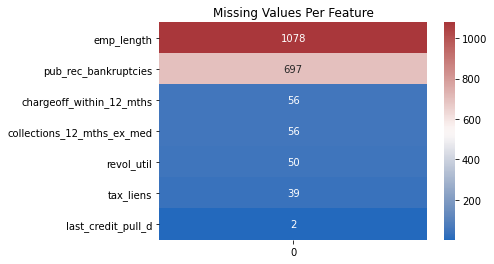

In [416]:
plt.title('Missing Values Per Feature')
sns.heatmap(
    loans_2007_cleaned_na.to_frame(), 
    annot=True, 
    fmt='d', 
    cmap='vlag') # seaborn

In [417]:
loans_2007_cleaned = loans_2007_cleaned.dropna()

In [418]:
print(df.shape)
print(loans_2007_cleaned.shape)

(39786, 47)
(37961, 28)


In [419]:
loans_2007_cleaned.isna().sum().sort_values(ascending=False)

loan_amnt                     0
term                          0
pub_rec_bankruptcies          0
delinq_amnt                   0
chargeoff_within_12_mths      0
application_type              0
collections_12_mths_ex_med    0
last_credit_pull_d            0
initial_list_status           0
total_acc                     0
revol_util                    0
revol_bal                     0
pub_rec                       0
open_acc                      0
inq_last_6mths                0
earliest_cr_line              0
delinq_2yrs                   0
dti                           0
addr_state                    0
pymnt_plan                    0
loan_status                   0
verification_status           0
annual_inc                    0
home_ownership                0
emp_length                    0
grade                         0
installment                   0
tax_liens                     0
dtype: int64

In [420]:
loans_2007_cleaned_nums = loans_2007_cleaned.select_dtypes(include='number')
loans_2007_cleaned_nums.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,37961.000000,37961.000000,3.796100e+04,37961.000000,37961.000000,37961.000000,37961.000000,37961.000000,37961.000000,37961.000000,37961.0,37961.0,37961.0,37961.000000,37961.0
mean,11336.645505,327.236065,6.965003e+04,13.378158,0.145992,0.867311,9.322146,0.053845,13480.693607,22.191881,0.0,0.0,0.0,0.041569,0.0
std,7486.836692,209.194035,6.357553e+04,6.656353,0.490986,1.066723,4.374751,0.235314,15880.916128,11.383631,0.0,0.0,0.0,0.200526,0.0
min,500.000000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,0.0,0.0,0.000000,0.0
25%,5600.000000,168.740000,4.189200e+04,8.270000,0.000000,0.000000,6.000000,0.000000,3789.000000,14.000000,0.0,0.0,0.0,0.000000,0.0
50%,10000.000000,283.280000,6.000000e+04,13.470000,0.000000,1.000000,9.000000,0.000000,8981.000000,21.000000,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,435.040000,8.350000e+04,18.630000,0.000000,1.000000,12.000000,0.000000,17178.000000,29.000000,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,0.0,0.0,0.0,2.000000,0.0


In [421]:
loans_2007_cleaned_obj = loans_2007_cleaned.select_dtypes(include='object')
loans_2007_cleaned_obj

,term,grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,addr_state,earliest_cr_line,revol_util,initial_list_status,last_credit_pull_d,application_type
0,36 months,B,10+ years,RENT,Verified,Fully Paid,n,AZ,Jan-85,83.70%,f,Jan-17,INDIVIDUAL
1,60 months,C,< 1 year,RENT,Source Verified,Charged Off,n,GA,Apr-99,9.40%,f,Oct-16,INDIVIDUAL
2,36 months,C,10+ years,RENT,Not Verified,Fully Paid,n,IL,Nov-01,98.50%,f,Jan-17,INDIVIDUAL
3,36 months,C,10+ years,RENT,Source Verified,Fully Paid,n,CA,Feb-96,21%,f,Apr-16,INDIVIDUAL
4,60 months,B,1 year,RENT,Source Verified,Fully Paid,n,OR,Jan-96,53.90%,f,Jan-17,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39544,36 months,B,6 years,MORTGAGE,Not Verified,Fully Paid,n,IL,Oct-79,18.60%,f,Oct-16,INDIVIDUAL
39620,36 months,C,2 years,RENT,Not Verified,Fully Paid,n,VA,Dec-00,96.50%,f,Oct-16,INDIVIDUAL
39631,36 months,C,1 year,RENT,Not Verified,Fully Paid,n,VA,Mar-00,68.70%,f,Aug-08,INDIVIDUAL
39642,36 months,C,3 years,MORTGAGE,Not Verified,Fully Paid,n,AZ,Feb-89,79%,f,Jan-17,INDIVIDUAL


In [422]:
loans_2007_cleaned = loans_2007_cleaned.drop(columns=[
    'collections_12_mths_ex_med',
    'chargeoff_within_12_mths',
    'delinq_amnt',
    'tax_liens'
])

In [425]:
loans_2007_cleaned.shape

(37961, 24)

In [447]:
loans_2007_cleaned = loans_2007_cleaned.drop(columns=[
    'initial_list_status',
    'pymnt_plan'
])
loans_2007_cleaned

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,application_type,pub_rec_bankruptcies
0,5000,36 months,162.87,B,10+ years,RENT,24000.00,Verified,Fully Paid,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,Jan-17,INDIVIDUAL,0.0
1,2500,60 months,59.83,C,< 1 year,RENT,30000.00,Source Verified,Charged Off,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,Oct-16,INDIVIDUAL,0.0
2,2400,36 months,84.33,C,10+ years,RENT,12252.00,Not Verified,Fully Paid,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,Jan-17,INDIVIDUAL,0.0
3,10000,36 months,339.31,C,10+ years,RENT,49200.00,Source Verified,Fully Paid,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,Apr-16,INDIVIDUAL,0.0
4,3000,60 months,67.79,B,1 year,RENT,80000.00,Source Verified,Fully Paid,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,Jan-17,INDIVIDUAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39544,12000,36 months,381.66,B,6 years,MORTGAGE,100671.39,Not Verified,Fully Paid,IL,6.64,0,Oct-79,0,16,1,7606,18.60%,39,Oct-16,INDIVIDUAL,1.0
39620,12375,36 months,404.62,C,2 years,RENT,80000.00,Not Verified,Fully Paid,VA,9.23,0,Dec-00,0,4,1,13126,96.50%,4,Oct-16,INDIVIDUAL,1.0
39631,4800,36 months,155.52,C,1 year,RENT,35000.00,Not Verified,Fully Paid,VA,7.51,0,Mar-00,0,11,1,5836,68.70%,12,Aug-08,INDIVIDUAL,1.0
39642,7000,36 months,227.82,C,3 years,MORTGAGE,63500.00,Not Verified,Fully Paid,AZ,8.50,0,Feb-89,1,9,1,14930,79%,21,Jan-17,INDIVIDUAL,1.0


In [466]:
cols_to_cat = [
    'term', 
    'grade',
    'emp_length',
    'home_ownership',
    'verification_status',
    'loan_status',
    'addr_state',
    'application_type'
]
loans_2007_cleaned[cols_to_cat] = loans_2007_cleaned[cols_to_cat].astype('category')
loans_2007_cleaned.dtypes


loan_amnt                  int64
term                    category
installment              float64
grade                   category
emp_length              category
home_ownership          category
annual_inc               float64
verification_status     category
loan_status             category
addr_state              category
dti                      float64
delinq_2yrs                int64
earliest_cr_line          object
inq_last_6mths             int64
open_acc                   int64
pub_rec                    int64
revol_bal                  int64
revol_util                object
total_acc                  int64
last_credit_pull_d        object
application_type        category
pub_rec_bankruptcies     float64
dtype: object

In [470]:
loans_2007_cleaned['revol_util'] = loans_2007_cleaned['revol_util'].replace({'%':''}, regex=True).astype('float64')

In [471]:
loans_2007_cleaned.dtypes

loan_amnt                  int64
term                    category
installment              float64
grade                   category
emp_length              category
home_ownership          category
annual_inc               float64
verification_status     category
loan_status             category
addr_state              category
dti                      float64
delinq_2yrs                int64
earliest_cr_line          object
inq_last_6mths             int64
open_acc                   int64
pub_rec                    int64
revol_bal                  int64
revol_util               float64
total_acc                  int64
last_credit_pull_d        object
application_type        category
pub_rec_bankruptcies     float64
dtype: object

In [477]:
loans_2007_cleaned.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,application_type,pub_rec_bankruptcies
0,5000,36 months,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,Jan-17,INDIVIDUAL,0.0
1,2500,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,Oct-16,INDIVIDUAL,0.0
2,2400,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,Jan-17,INDIVIDUAL,0.0
3,10000,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,Apr-16,INDIVIDUAL,0.0
4,3000,60 months,67.79,B,1 year,RENT,80000.0,Source Verified,Fully Paid,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,Jan-17,INDIVIDUAL,0.0


In [476]:
loans_2007_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37961 entries, 0 to 39692
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             37961 non-null  int64   
 1   term                  37961 non-null  category
 2   installment           37961 non-null  float64 
 3   grade                 37961 non-null  category
 4   emp_length            37961 non-null  category
 5   home_ownership        37961 non-null  category
 6   annual_inc            37961 non-null  float64 
 7   verification_status   37961 non-null  category
 8   loan_status           37961 non-null  category
 9   addr_state            37961 non-null  category
 10  dti                   37961 non-null  float64 
 11  delinq_2yrs           37961 non-null  int64   
 12  earliest_cr_line      37961 non-null  object  
 13  inq_last_6mths        37961 non-null  int64   
 14  open_acc              37961 non-null  int64   
 15  pu

In [514]:
loans_2007_cleaned["loan_status"].value_counts()

Fully Paid            32649
Charged Off            5297
Late (31-120 days)       10
Current                   2
Default                   1
In Grace Period           1
Late (16-30 days)         1
Name: loan_status, dtype: int64

In [506]:
meaning = [
    "Loan has been fully paid off.",
    "Loan for which there is no longer a reasonable expectation of further payments.",
    "Loan is up to date on current payments.",
    "The loan is past due but still in the grace period of 15 days.",
    "Loan hasn't been paid in 31 to 120 days (late on the current payment).",
    "Loan hasn't been paid in 16 to 30 days (late on the current payment).",
    "Loan is defaulted on and no payment has been made for more than 121 days."
]

Fully Paid            32649
Charged Off            5297
Late (31-120 days)       10
Current                   2
Default                   1
In Grace Period           1
Late (16-30 days)         1


status = loans_2007_cleaned["loan_status"].value_counts().index
count = loans_2007_cleaned["loan_status"].value_counts().values
#loan_statuses_explanation = pd.DataFrame({'Loan Status': status,'Count': count,'Meaning': meaning})[['Loan Status','Count','Meaning']]

#loan_statuses_explanation

array([32649,  5297,    10,     2,     1,     1,     1])

In [513]:
loans_2007_cleaned.select_dtypes(include='category')

,term,grade,emp_length,home_ownership,verification_status,loan_status,addr_state,application_type
0,36 months,B,10+ years,RENT,Verified,Fully Paid,AZ,INDIVIDUAL
1,60 months,C,< 1 year,RENT,Source Verified,Charged Off,GA,INDIVIDUAL
2,36 months,C,10+ years,RENT,Not Verified,Fully Paid,IL,INDIVIDUAL
3,36 months,C,10+ years,RENT,Source Verified,Fully Paid,CA,INDIVIDUAL
4,60 months,B,1 year,RENT,Source Verified,Fully Paid,OR,INDIVIDUAL
...,...,...,...,...,...,...,...,...
39544,36 months,B,6 years,MORTGAGE,Not Verified,Fully Paid,IL,INDIVIDUAL
39620,36 months,C,2 years,RENT,Not Verified,Fully Paid,VA,INDIVIDUAL
39631,36 months,C,1 year,RENT,Not Verified,Fully Paid,VA,INDIVIDUAL
39642,36 months,C,3 years,MORTGAGE,Not Verified,Fully Paid,AZ,INDIVIDUAL
